In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('cluster_mpg.csv')
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
135,13.0,8,350.0,150.0,4699,14.5,74,usa,buick century luxus (sw)
305,26.8,6,173.0,115.0,2700,12.9,79,usa,oldsmobile omega brougham
79,22.0,4,122.0,86.0,2395,16.0,72,usa,ford pinto (sw)
189,22.0,6,225.0,100.0,3233,15.4,76,usa,plymouth valiant
226,18.5,6,250.0,98.0,3525,19.0,77,usa,ford granada


In [40]:
df.shape

(392, 9)

In [41]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [42]:
df['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [43]:
df_w_dum = pd.get_dummies(df.drop('name',axis=1))
df_w_dum.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True


In [44]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc_df = sc.fit_transform(df_w_dum)
sc_df = pd.DataFrame(sc_df,columns=df_w_dum.columns)
sc_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<Axes: >

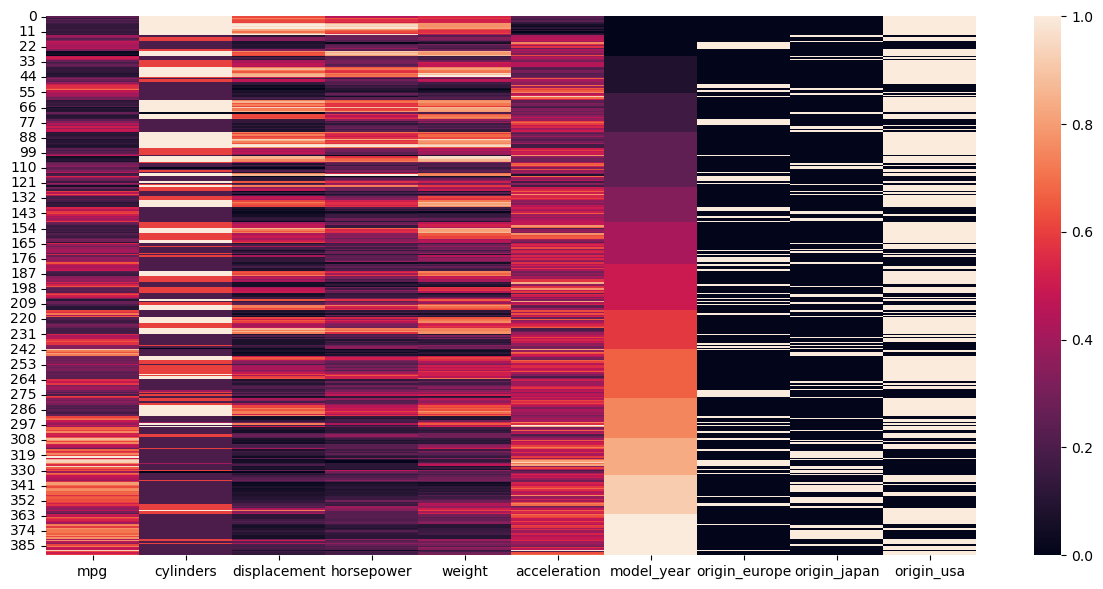

In [45]:
plt.figure(figsize=(15,7))
sns.heatmap(sc_df)

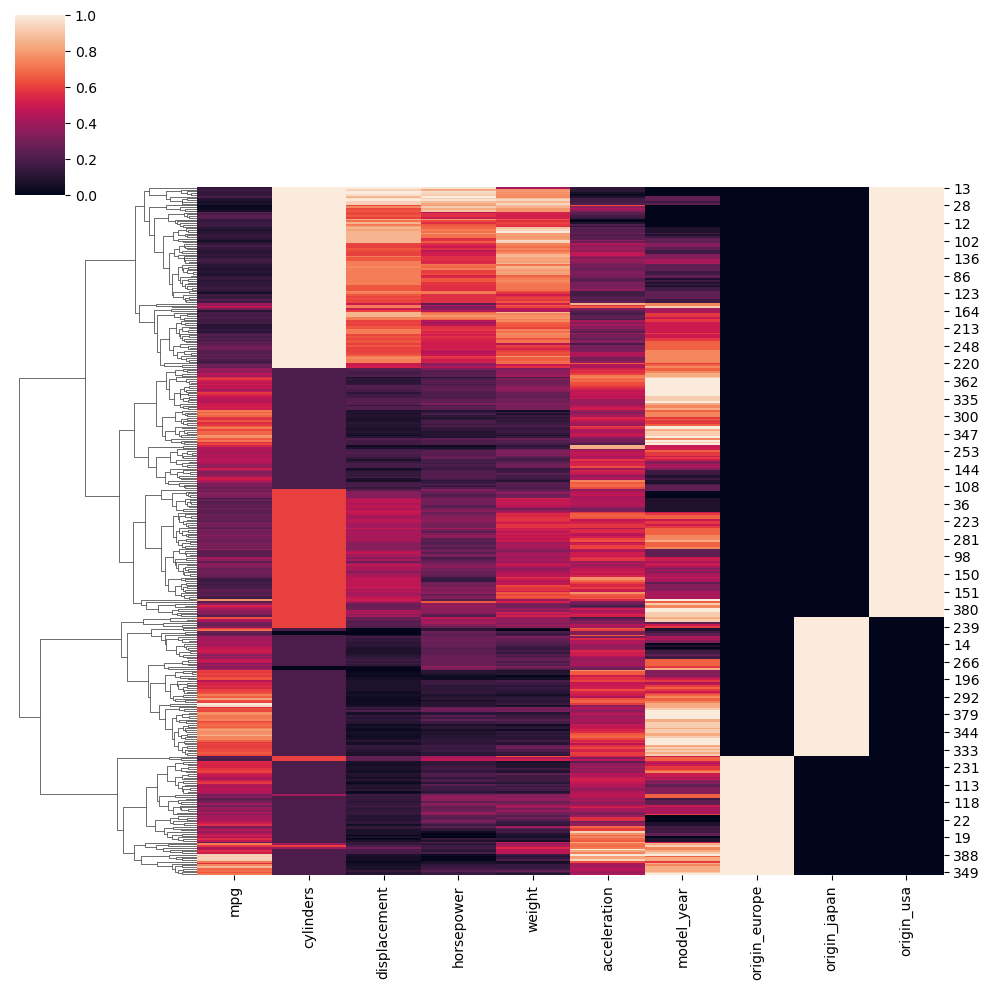

In [46]:
sns.clustermap(sc_df, col_cluster=False)

In [47]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(sc_df)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<Axes: xlabel='mpg', ylabel='weight'>

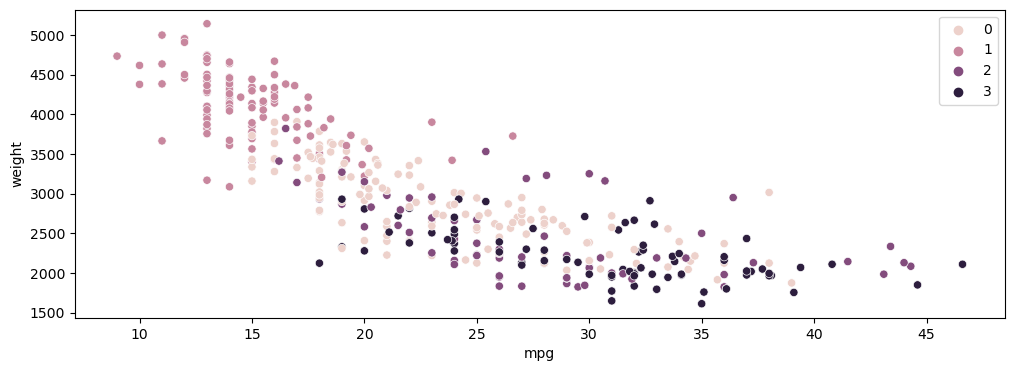

In [48]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df,x='mpg',y='weight',hue=labels)

### Every point is its own cluster

In [49]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
labels = model.fit_predict(sc_df)
labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [50]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

### Linkage Matrix

In [51]:
model.children_

array([[ 67,  68],
       [232, 234],
       [ 63,  74],
       [127, 143],
       [250, 258],
       [ 34,  36],
       [283, 286],
       [  6,   7],
       [ 86, 114],
       [363, 390],
       [141, 146],
       [ 60,  79],
       [252, 257],
       [249, 260],
       [ 46, 397],
       [ 96,  98],
       [ 17,  24],
       [150, 174],
       [ 80,  83],
       [159, 160],
       [206, 213],
       [128, 130],
       [377, 379],
       [334, 335],
       [367, 386],
       [155, 157],
       [185, 186],
       [147, 148],
       [362, 401],
       [ 95, 123],
       [285, 288],
       [  2,   4],
       [374, 375],
       [ 35,  47],
       [ 85,  88],
       [365, 366],
       [180, 184],
       [ 18,  29],
       [179, 196],
       [ 41,  43],
       [173, 195],
       [336, 382],
       [104, 105],
       [175, 177],
       [231, 238],
       [140, 145],
       [341, 345],
       [188, 211],
       [333, 351],
       [125, 167],
       [197, 225],
       [278, 282],
       [ 39,

In [52]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

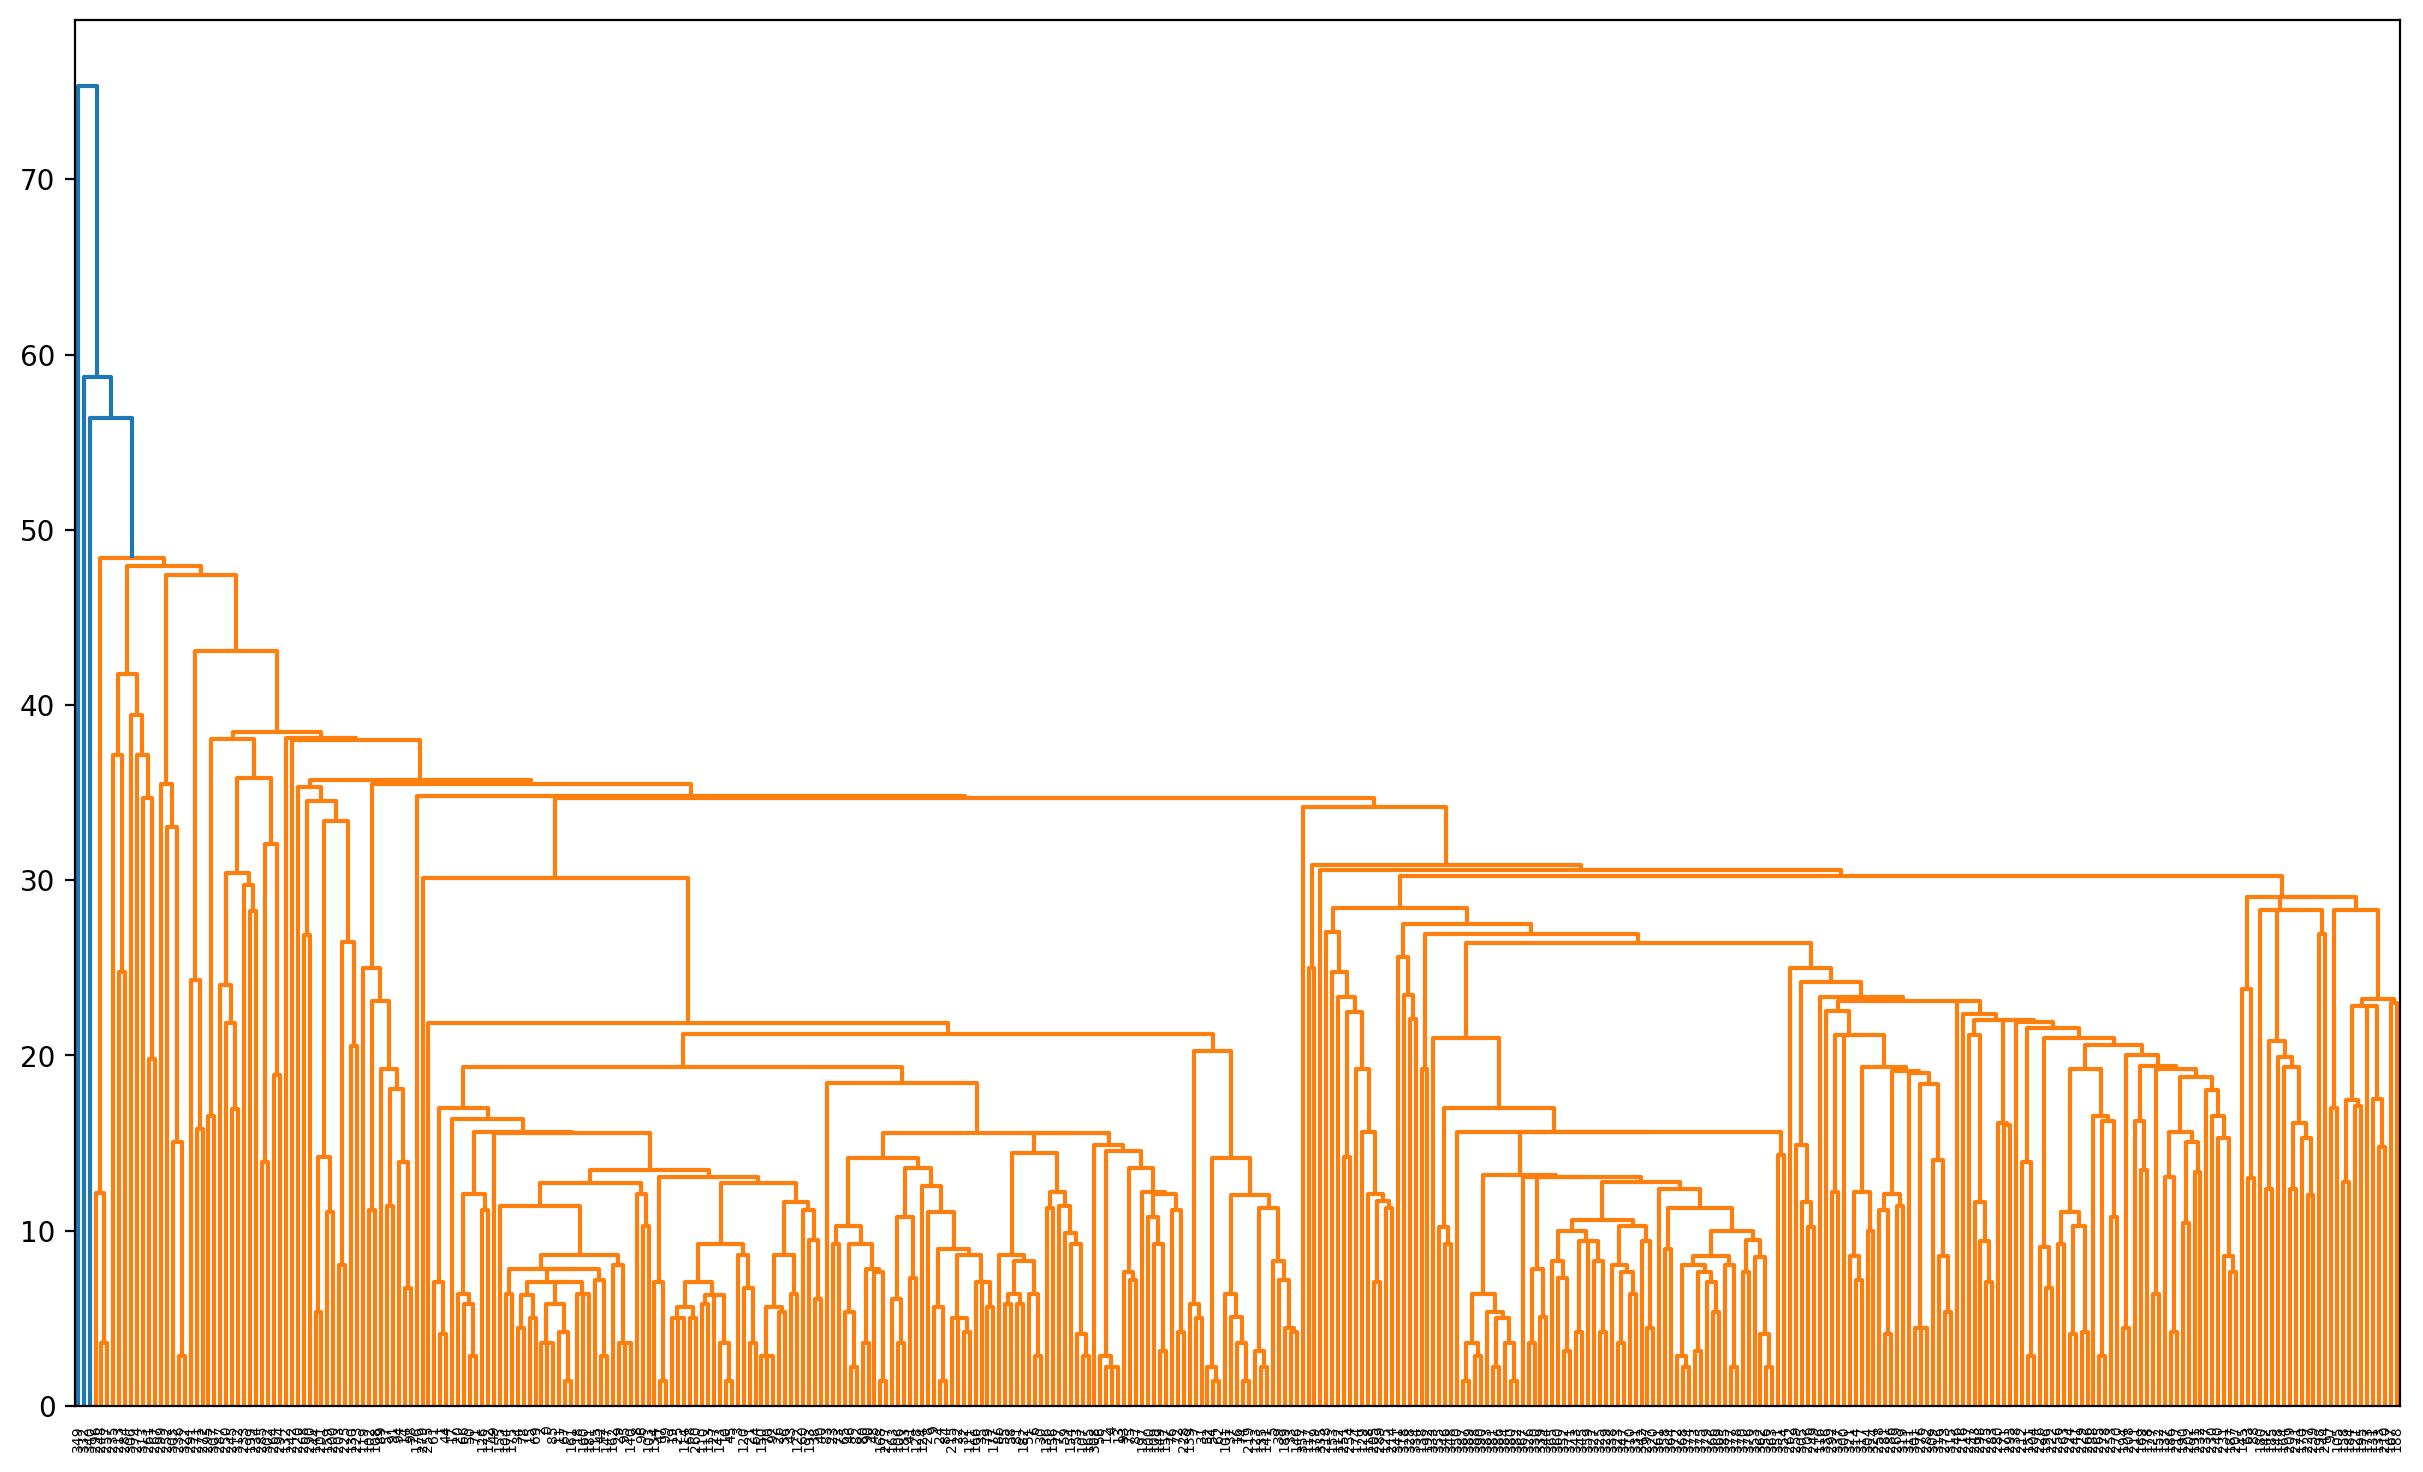

In [53]:
plt.figure(figsize=(15,9),dpi=200)
dn = hierarchy.dendrogram(linkage_matrix)

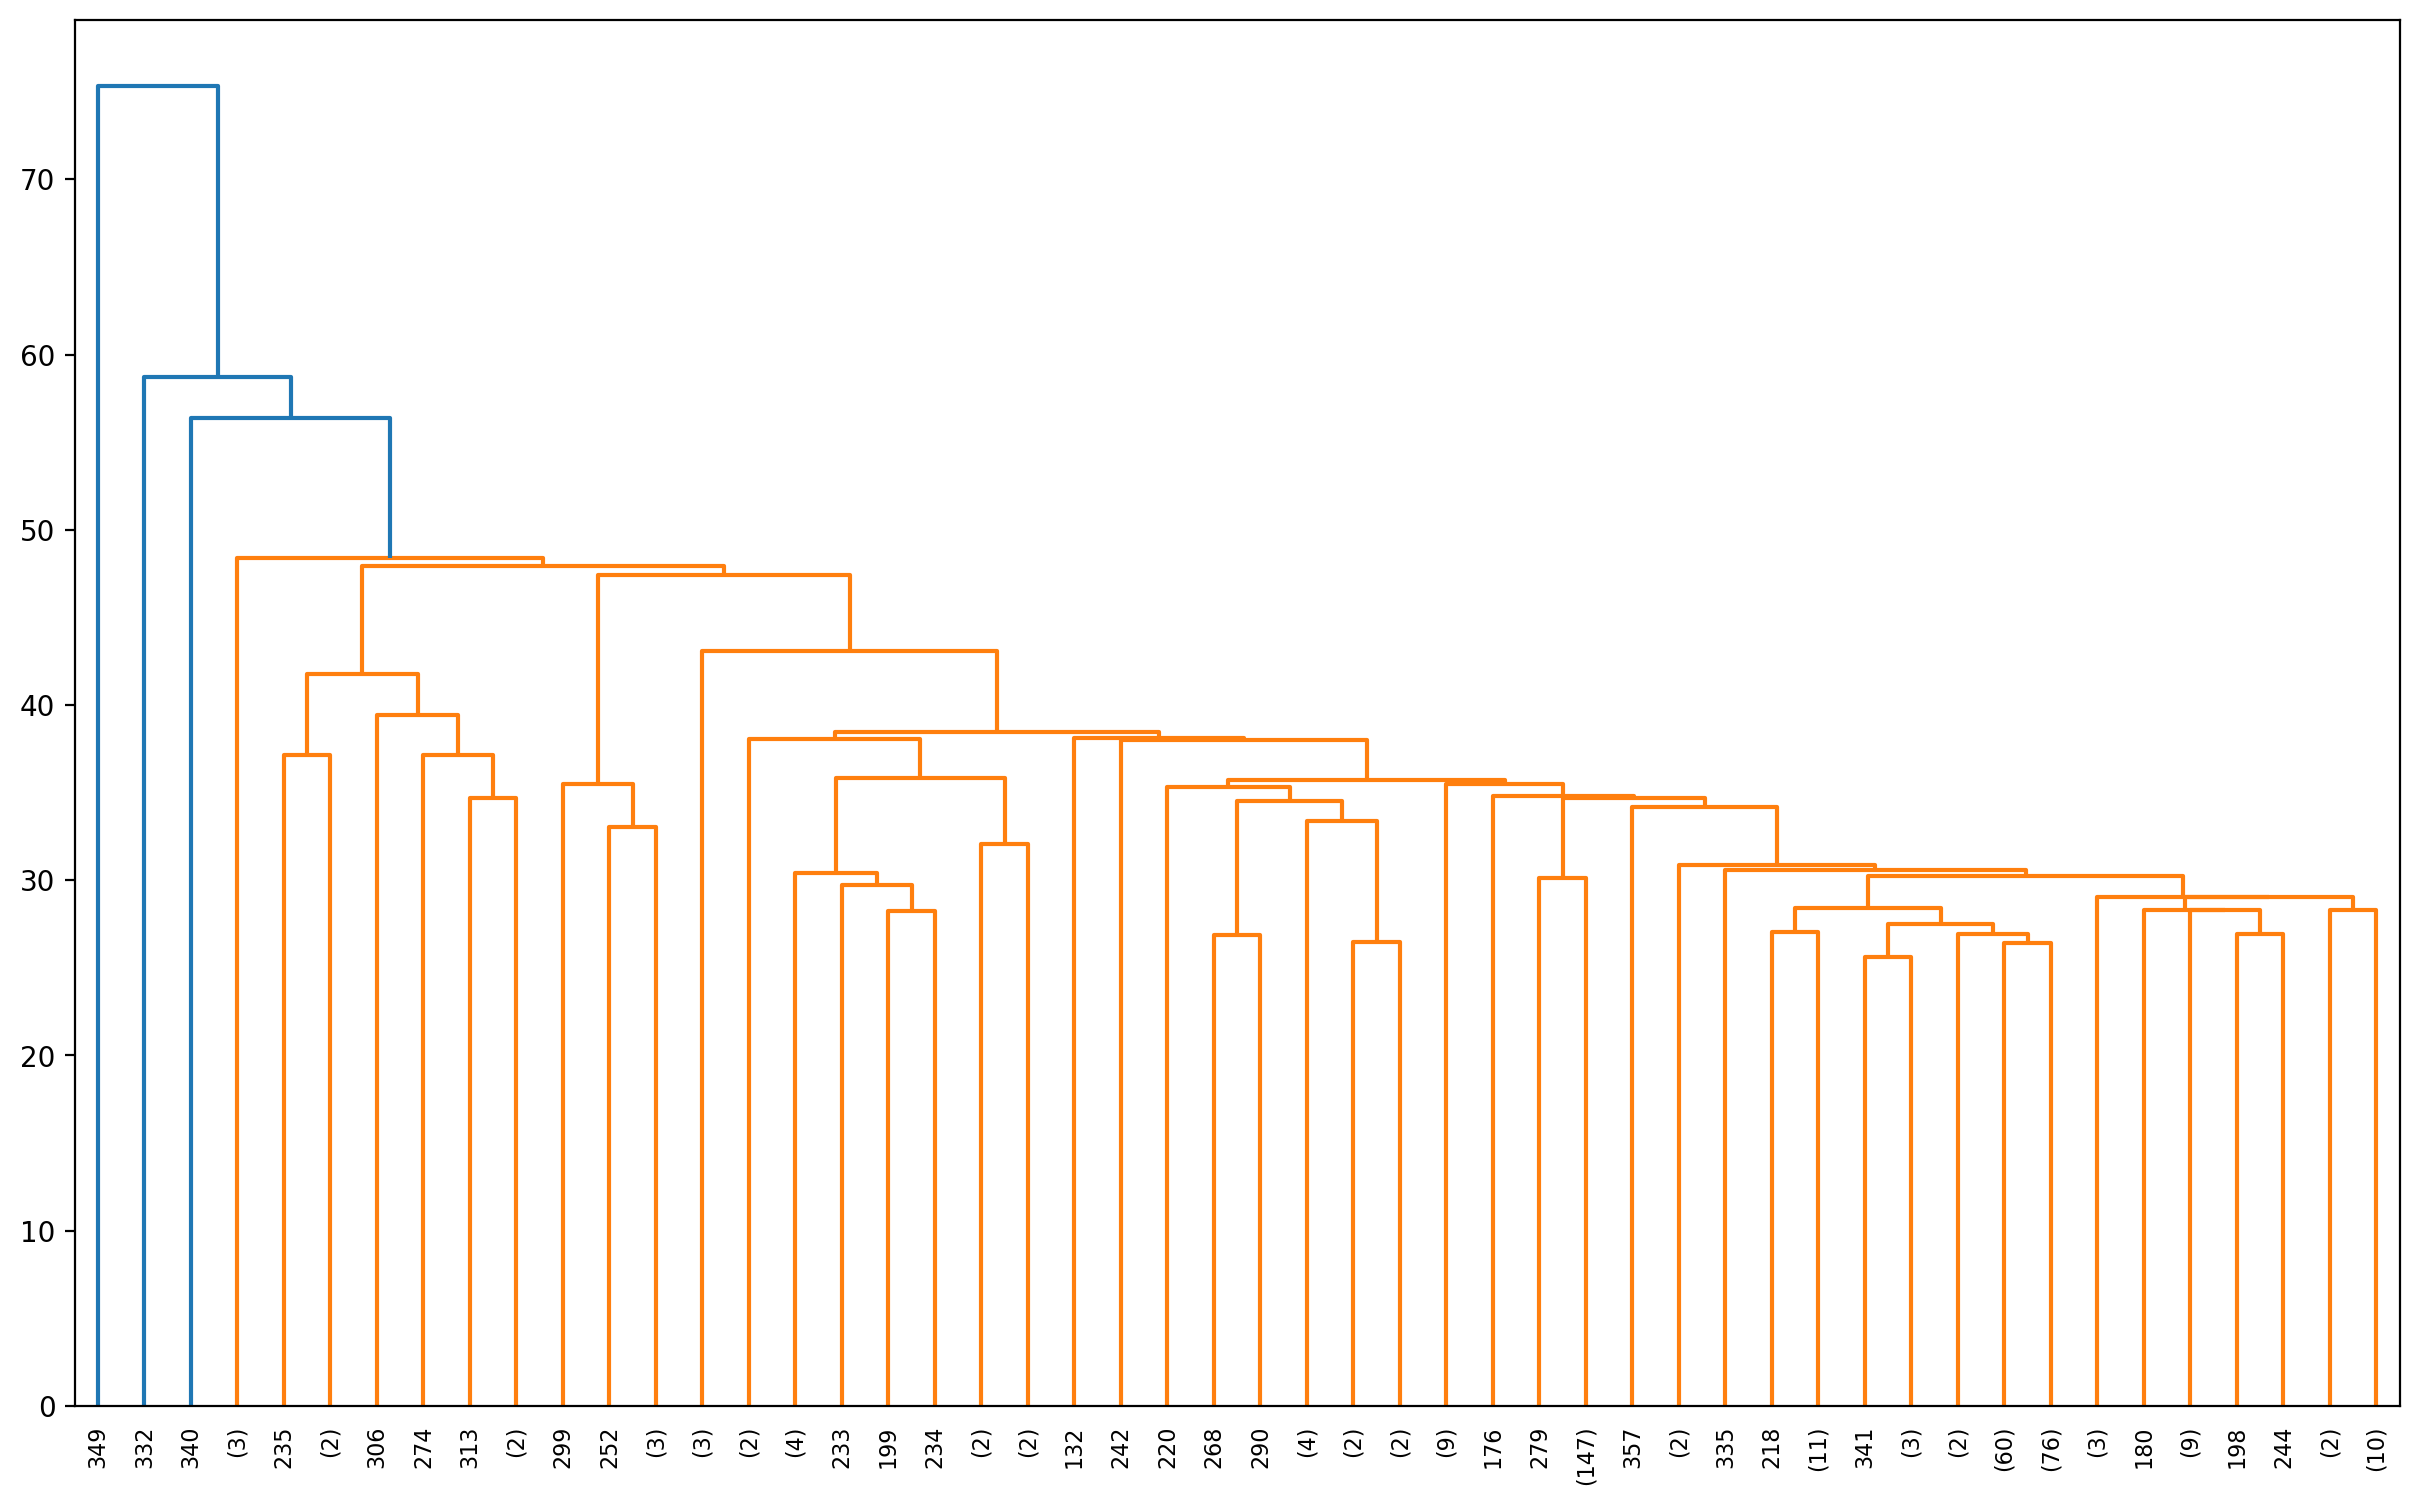

In [56]:
plt.figure(figsize=(15,9),dpi=200)
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=50)

## Choosing threshold distance

In [57]:
sc_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
sc_df['mpg'].idxmax()

320

In [59]:
sc_df['mpg'].idxmin()

28

In [62]:
a = sc_df.iloc[320]
b = sc_df.iloc[28]

dist = np.linalg.norm(a-b)
dist

2.3852929970374714

In [65]:
np.sqrt(len(sc_df.columns))

3.1622776601683795

In [67]:
model_2 = AgglomerativeClustering(n_clusters=None,distance_threshold=2)
labels_2 = model_2.fit_predict(sc_df)
np.unique(labels_2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [70]:
lm = hierarchy.linkage(model_2.children_)

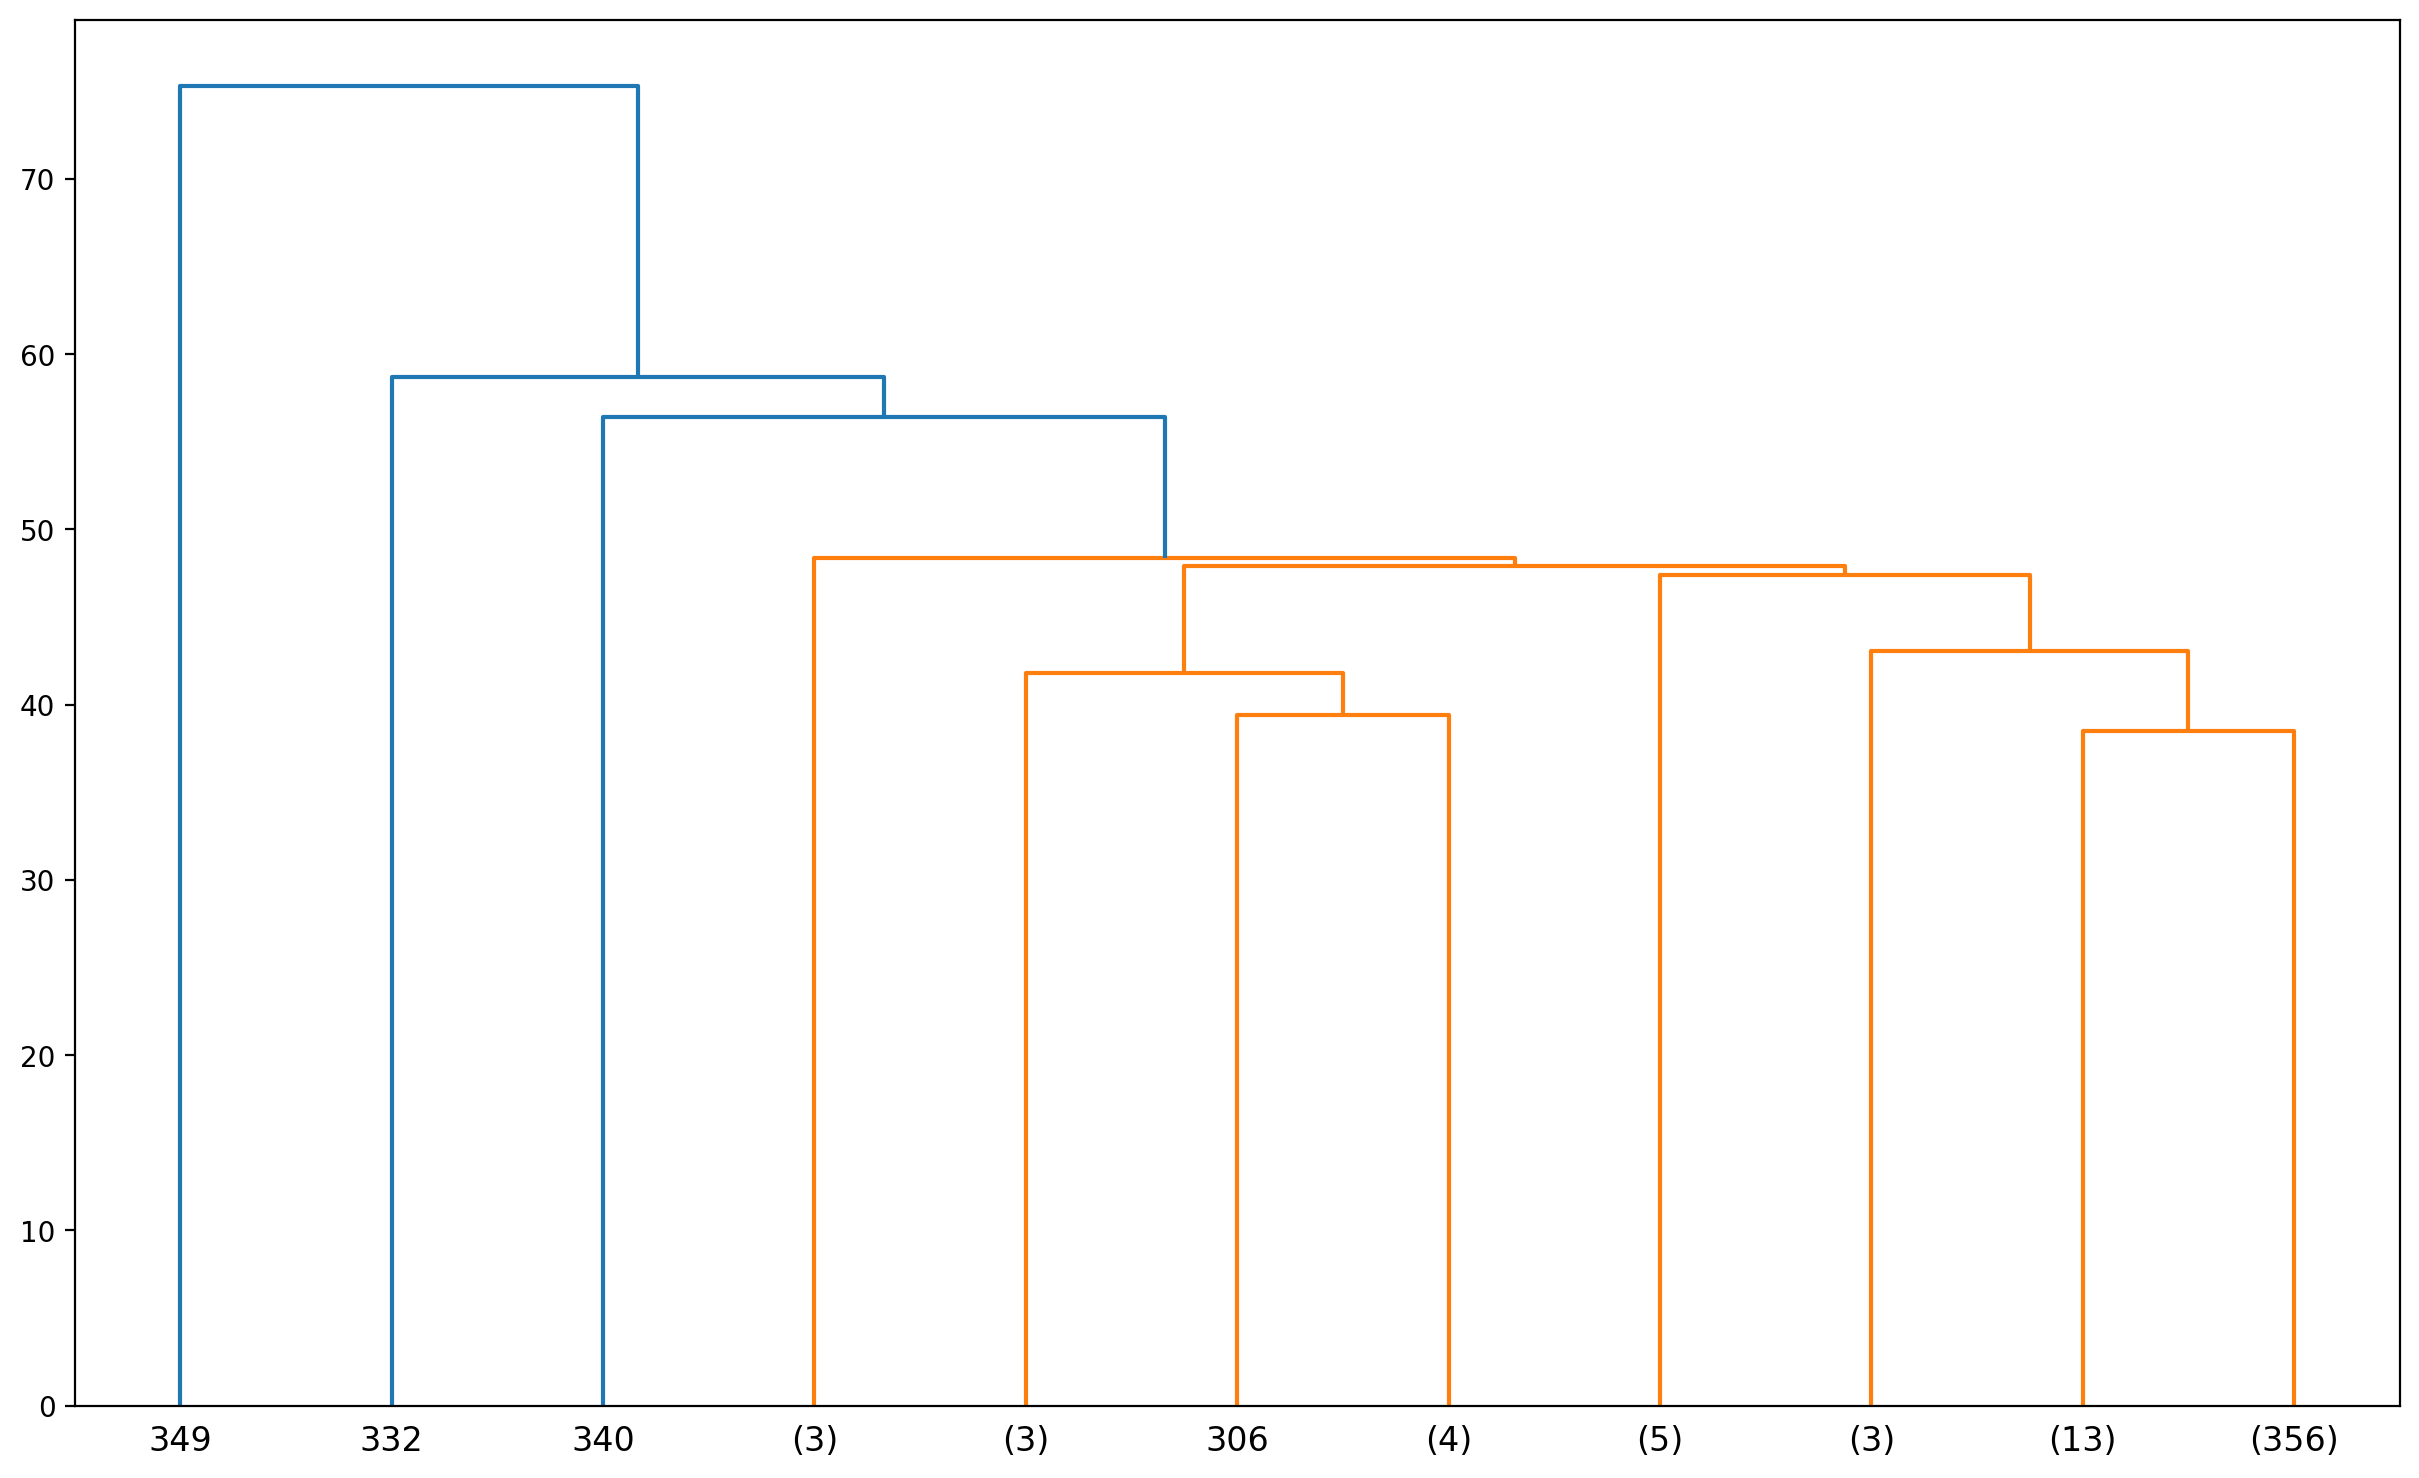

In [71]:
plt.figure(figsize=(15,9),dpi=200)
dn = hierarchy.dendrogram(lm,truncate_mode='lastp',p=11)